<a href="https://colab.research.google.com/github/TobiasM95/IntroDataScience/blob/main/IntroToDataScience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prologue

##What is Data Science

###- Working with data
###- Where does data come from
###- Quantification of events
###- Where can you find data science
###- What forms of data science exist

##Components of this notebook

###- Introduction to the technology used here
###- Load and transforming of data
###- Visualizing of data
###- Generating insights through data
###- Modelling of data

#Iris plants Dataset
##What does the dataset contain
###- Classification of 150 plants based on petal and sepal sizes
###- Small toy dataset perfectly suited for a data science introduction
##What is the goal of the analysis
###- Getting a feel for the data
###- Trying out simple data science techniques
###- Small glimpse into advanced machine learning techniques

In [ ]:
!pip install numpy pandas matplotlib seaborn scikit-learn
#!pip install torch torchvision torchaudio

In [ ]:
%load_ext google.colab.data_table
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import torch
import torch.nn as nn

In [ ]:
dataset = load_iris()
dataset

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
print(dataset.keys())
print(len(dataset.target))
print(dataset.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
150
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    

In [ ]:
iris_dataframe = pd.DataFrame(
    data=dataset.data,
    columns=["sepal length [cm]", "sepal width [cm]", "petal length [cm]", "petal width [cm]"]
)
iris_dataframe["species id"] = dataset.target
iris_dataframe["species"] = pd.Series(dataset.target).apply(lambda x: dataset.target_names[x])
iris_dataframe

,sepal length [cm],sepal width [cm],petal length [cm],petal width [cm],species id,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [ ]:
iris_dataframe.describe()

,sepal length [cm],sepal width [cm],petal length [cm],petal width [cm],species id
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


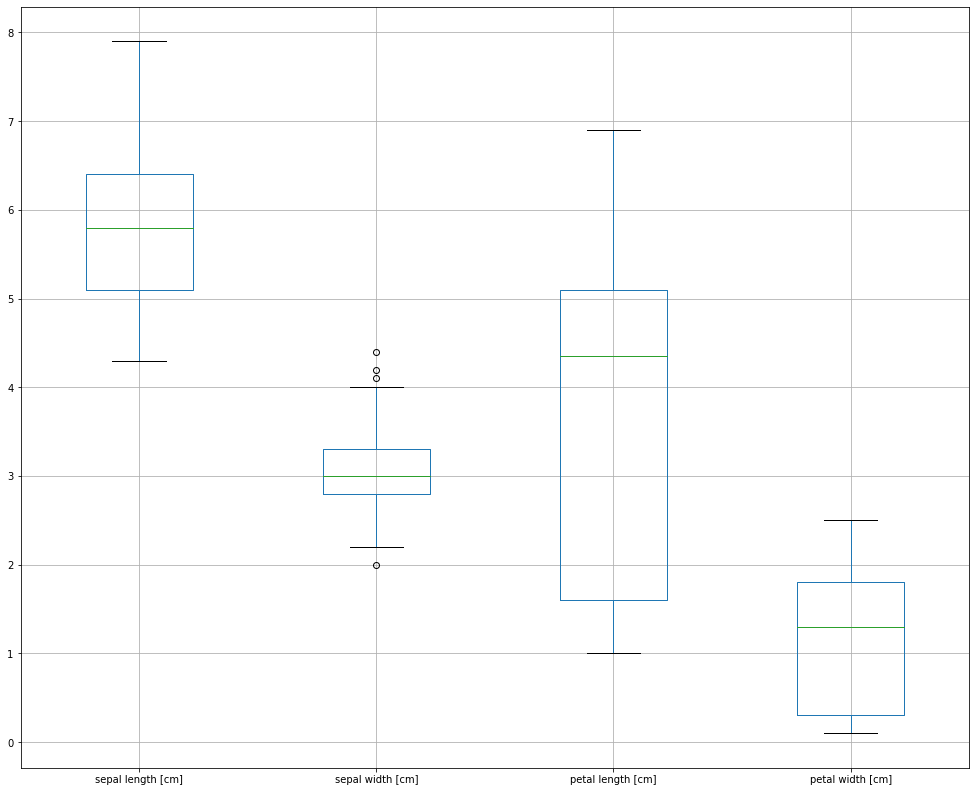

In [ ]:
iris_dataframe.boxplot(column=list(iris_dataframe.columns)[:4], figsize=(17,14))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f95f5c58150>,
      dtype=object)

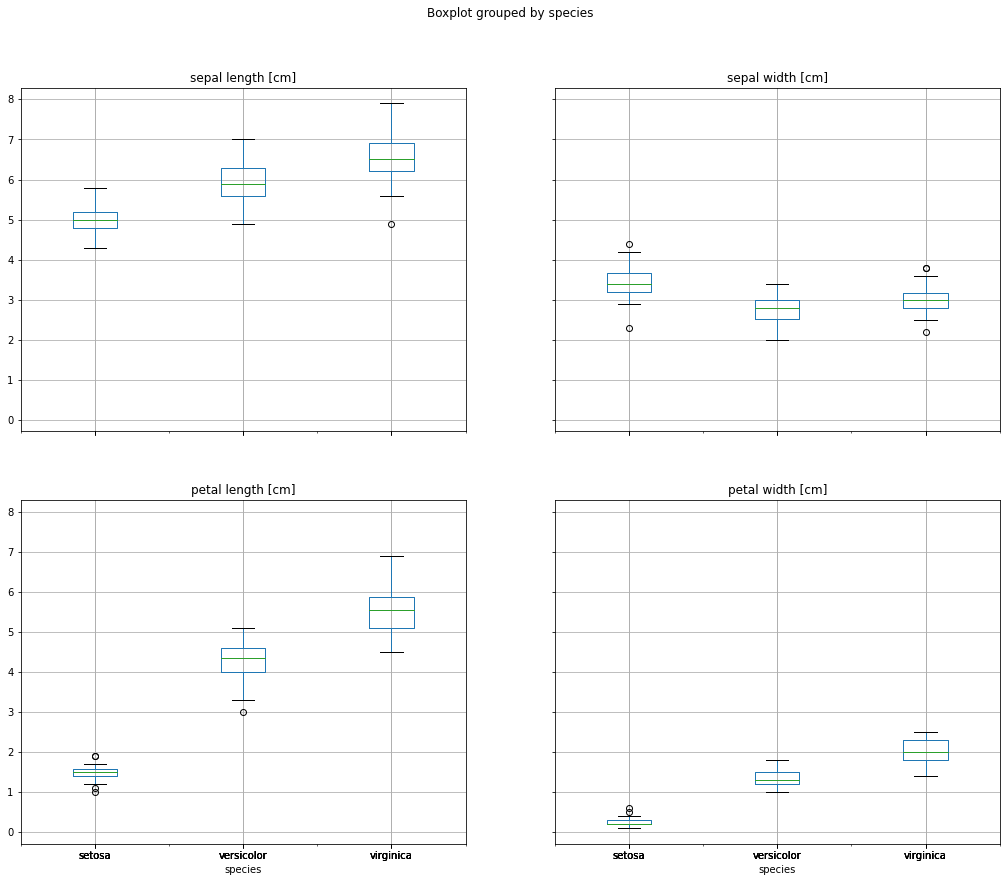

In [ ]:
iris_dataframe.boxplot(column=list(iris_dataframe.columns)[:4], by="species", figsize=(17,14))

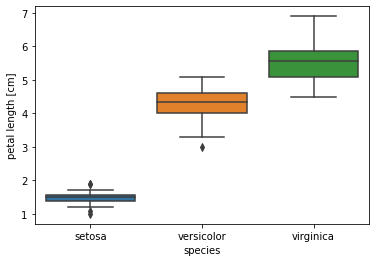

In [ ]:
sns.boxplot(x="species", y="petal length [cm]", data=iris_dataframe)

##Interlude:
Analysis with and without known type (and in general with partial type or uncertain type, e.g. BKS with wrong types)

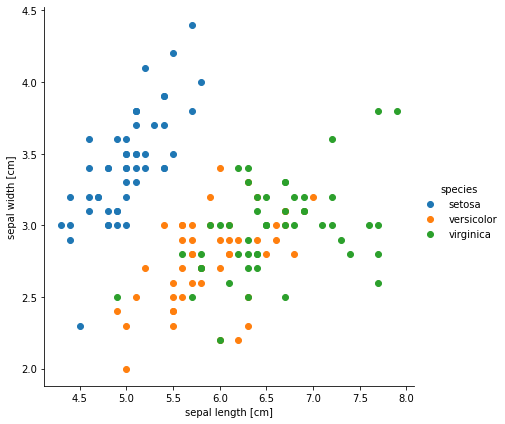

In [ ]:
sns.FacetGrid(iris_dataframe, hue="species", height=6).map(plt.scatter, "sepal length [cm]", "sepal width [cm]").add_legend()

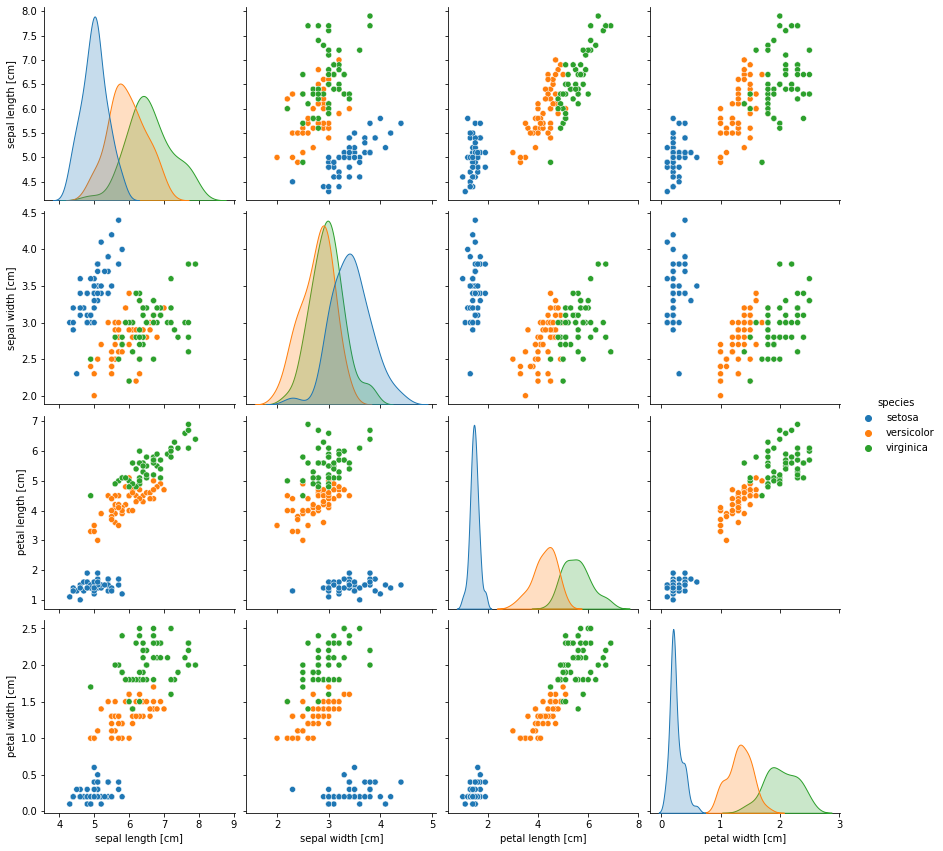

In [ ]:
sns.pairplot(iris_dataframe.drop("species id", axis=1), hue="species", height=3)

In [ ]:
#sklearn functions for this exist but we do it manually with dfs to emulate real world
x = iris_dataframe.iloc[:,0:4].to_numpy()
y = iris_dataframe["species id"].to_numpy()

#logreg = LogisticRegression(random_state=0).fit(iris_dataframe.iloc[:,0:4], iris_dataframe["species id"])
logreg = LogisticRegression(random_state=0, max_iter=1000).fit(x, y)
prediction = logreg.predict(x)
print(prediction)
print((iris_dataframe["species id"] != prediction).sum())
print(f"{np.around(100*(1.0 - 4.0/150),1)}%")

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
4
97.3%


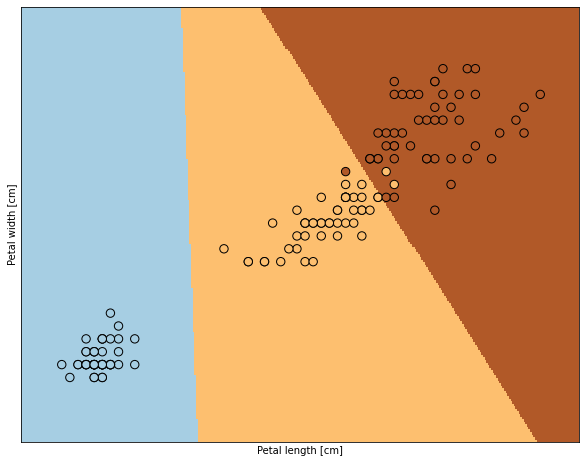

In [ ]:
sepal_width = 3
sepal_length = 5.6
x_min, x_max = x[:, 2].min() - 0.5, x[:, 2].max() + 0.5
y_min, y_max = x[:, 3].min() - 0.5, x[:, 3].max() + 0.5
h = 0.02 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
sample_size = xx.ravel().shape[0]
synthetic_data = np.hstack((sepal_length*np.ones((sample_size,1)), sepal_width*np.ones((sample_size,1)), xx.reshape((-1,1)), yy.reshape((-1,1))))
Z = logreg.predict(synthetic_data)

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(x[:, 2], x[:, 3], c=y, edgecolors="k", cmap=plt.cm.Paired, s=70)
plt.xlabel("Petal length [cm]")
plt.ylabel("Petal width [cm]")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


Text(0, 0.5, 'Feature 2')

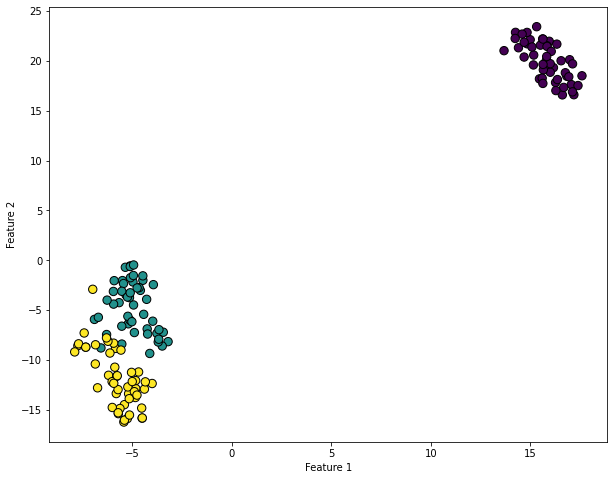

In [ ]:
tsne = TSNE(n_components=2, n_iter=1000, random_state=0)
tsne_fit = tsne.fit_transform(iris_dataframe.iloc[:, 0:4].to_numpy())
plt.figure(1, figsize=(10,8))
plt.scatter(tsne_fit[:, 0], tsne_fit[:, 1], c=y, edgecolors="k", s=70)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

Text(0, 0.5, 'Feature 2')

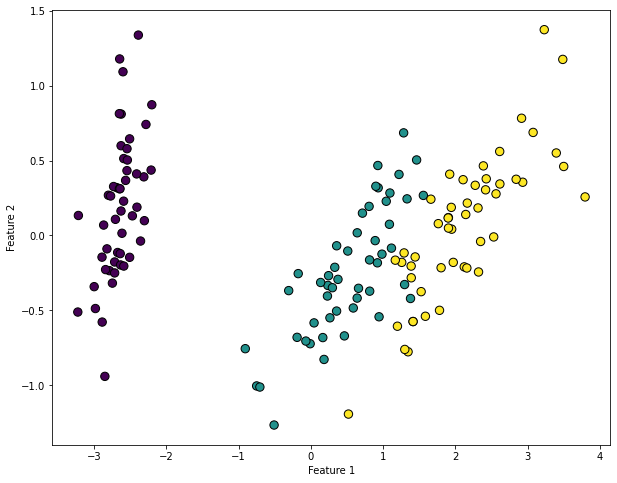

In [ ]:
pca = PCA(n_components=2)
pca_fit = pca.fit_transform(iris_dataframe.iloc[:,0:4])
plt.figure(1, figsize=(10,8))
plt.scatter(pca_fit[:, 0], pca_fit[:, 1], c=y, edgecolors="k", s=70)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

96.7%


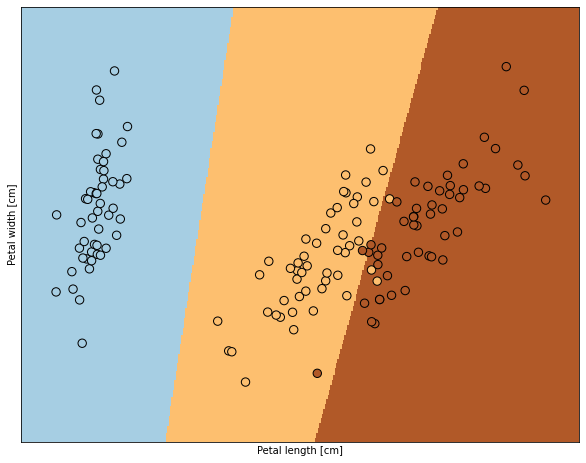

In [ ]:
x_min, x_max = pca_fit[:, 0].min() - 0.5, pca_fit[:, 0].max() + 0.5
y_min, y_max = pca_fit[:, 1].min() - 0.5, pca_fit[:, 1].max() + 0.5
h = 0.02 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
sample_size = xx.ravel().shape[0]
synthetic_data = np.hstack((xx.reshape((-1,1)), yy.reshape((-1,1))))
logreg = LogisticRegression(random_state=0, max_iter=1000).fit(pca_fit, y)
Z = logreg.predict(synthetic_data)
#Worse result?
print(f"{np.around(100*(1.0-(logreg.predict(pca_fit) != y).sum()/150.0), 1)}%")

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(pca_fit[:, 0], pca_fit[:, 1], c=y, edgecolors="k", cmap=plt.cm.Paired, s=70)
plt.xlabel("Petal length [cm]")
plt.ylabel("Petal width [cm]")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

100.0%


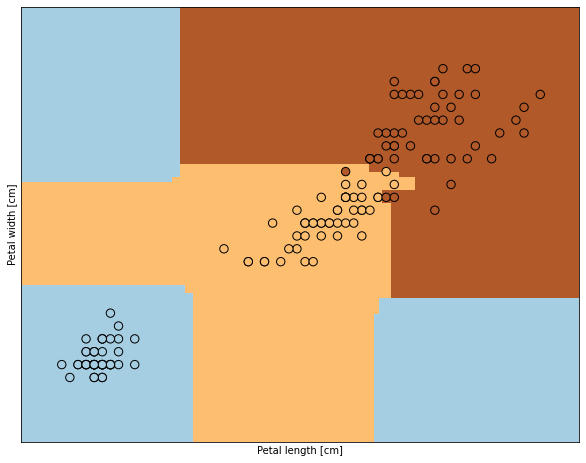

In [ ]:
sepal_width = 3
sepal_length = 5.6
x_min, x_max = x[:, 2].min() - 0.5, x[:, 2].max() + 0.5
y_min, y_max = x[:, 3].min() - 0.5, x[:, 3].max() + 0.5
h = 0.02 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
sample_size = xx.ravel().shape[0]
synthetic_data = np.hstack((sepal_length*np.ones((sample_size,1)), sepal_width*np.ones((sample_size,1)), xx.reshape((-1,1)), yy.reshape((-1,1))))
#Performance vs overfit
#rfclass = RandomForestClassifier(max_depth=2, random_state=0).fit(x, y)
rfclass = RandomForestClassifier(random_state=0).fit(x, y)
Z = rfclass.predict(synthetic_data)
print(f"{np.around(100*(1.0-(rfclass.predict(x) != y).sum()/150.0), 1)}%")

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(x[:, 2], x[:, 3], c=y, edgecolors="k", cmap=plt.cm.Paired, s=70)
plt.xlabel("Petal length [cm]")
plt.ylabel("Petal width [cm]")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

#why is the 1 brown point in wrong region?
plt.show()

In [ ]:
class MLP(torch.nn.Module):
  def __init__(self, input_size, hidden_size, num_hidden_layers):
    super(MLP, self).__init__()
    self.num_hidden_layers = num_hidden_layers if num_hidden_layers > 2 else 2
    self.input_size = input_size
    self.hidden_size  = hidden_size
    self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
    self.fc2 = torch.nn.Linear(self.hidden_size, self.hidden_size)
    self.relu = torch.nn.ReLU()
    self.out = torch.nn.Linear(self.hidden_size, 3)
    self.sigmoid = torch.nn.Sigmoid()
  def forward(self, x):
    hidden = self.relu(self.fc1(x))
    for i in range(self.num_hidden_layers - 2):
      hidden = self.relu(self.fc2(hidden))
    output = self.out(hidden)
    output = self.sigmoid(output)
    return output

def train_model(model, optimizer, epochs, x, y, criterion):
  x_train = torch.tensor(x).to(torch.float)
  y_train = torch.tensor(y).to(torch.float)
  model.train()
  for epoch in range(epochs):
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(x_train)
    # Compute Loss
    loss = criterion(y_pred, y_train)
    
    if epoch % (epochs//20) == 0:
      print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
    # Backward pass
    loss.backward()
    optimizer.step()

Epoch 0: train loss: 0.6865475177764893
Epoch 500: train loss: 0.09449237585067749
Epoch 1000: train loss: 0.03295145556330681
Epoch 1500: train loss: 0.029535803943872452
Epoch 2000: train loss: 0.02759581245481968
Epoch 2500: train loss: 0.0265175960958004
Epoch 3000: train loss: 0.026067476719617844
Epoch 3500: train loss: 0.025802763178944588
Epoch 4000: train loss: 0.02548418752849102
Epoch 4500: train loss: 0.025126300752162933
Epoch 5000: train loss: 0.02474384382367134
Epoch 5500: train loss: 0.02422354184091091
Epoch 6000: train loss: 0.023662347346544266
Epoch 6500: train loss: 0.02309848740696907
Epoch 7000: train loss: 0.022522900253534317
Epoch 7500: train loss: 0.021867070347070694
Epoch 8000: train loss: 0.02128884382545948
Epoch 8500: train loss: 0.020594170317053795
Epoch 9000: train loss: 0.020044362172484398
Epoch 9500: train loss: 0.019425543025135994
98.7%


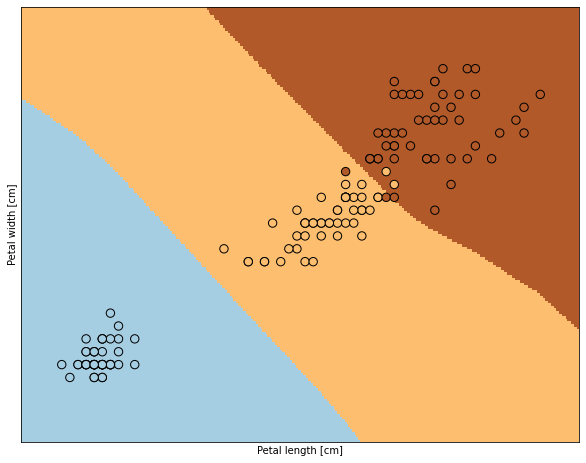

In [ ]:
sepal_width = 3
sepal_length = 5.6
x_min, x_max = x[:, 2].min() - 0.5, x[:, 2].max() + 0.5
y_min, y_max = x[:, 3].min() - 0.5, x[:, 3].max() + 0.5
h = 0.02 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
sample_size = xx.ravel().shape[0]
synthetic_data = np.hstack((sepal_length*np.ones((sample_size,1)), sepal_width*np.ones((sample_size,1)), xx.reshape((-1,1)), yy.reshape((-1,1))))

model = MLP(4, 50, 7)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(y.reshape((-1,1)))
y_oh = enc.transform(y.reshape((-1,1))).toarray()
train_model(model, optimizer, 10000, x, y_oh, torch.nn.BCELoss())

Z_oh = model(torch.Tensor(synthetic_data).to(torch.float))
Z = enc.inverse_transform(Z_oh.detach())
x_pred_oh = model(torch.Tensor(x).to(torch.float))
x_pred = enc.inverse_transform(x_pred_oh.detach())
print(f"{np.around(100*(1.0-(x_pred.ravel() != y).sum()/150.0), 1)}%")

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(x[:, 2], x[:, 3], c=y, edgecolors="k", cmap=plt.cm.Paired, s=70)
plt.xlabel("Petal length [cm]")
plt.ylabel("Petal width [cm]")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

Epoch 0: train loss: 0.7092465162277222
Epoch 500: train loss: 0.25940459966659546
Epoch 1000: train loss: 0.047475192695856094
Epoch 1500: train loss: 0.03933112323284149
Epoch 2000: train loss: 0.03291141986846924
Epoch 2500: train loss: 0.021044502034783363
Epoch 3000: train loss: 0.005071879830211401
Epoch 3500: train loss: 0.00114301941357553
Epoch 4000: train loss: 0.0004182697448413819
Epoch 4500: train loss: 0.00019616058852989227
Epoch 5000: train loss: 0.00010696427489165217
Epoch 5500: train loss: 6.333547935355455e-05
Epoch 6000: train loss: 3.918411675840616e-05
Epoch 6500: train loss: 2.523247167118825e-05
Epoch 7000: train loss: 1.6742847947170958e-05
Epoch 7500: train loss: 1.137021081376588e-05
Epoch 8000: train loss: 7.854778232285753e-06
Epoch 8500: train loss: 5.496637186297448e-06
Epoch 9000: train loss: 3.887962975568371e-06
Epoch 9500: train loss: 2.7828241400129627e-06
100.0%


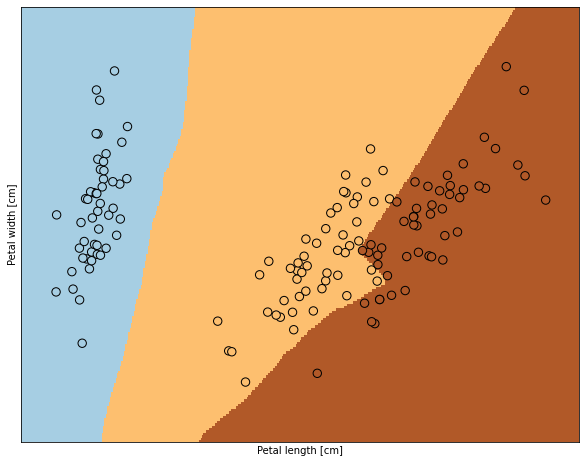

In [ ]:
x_min, x_max = pca_fit[:, 0].min() - 0.5, pca_fit[:, 0].max() + 0.5
y_min, y_max = pca_fit[:, 1].min() - 0.5, pca_fit[:, 1].max() + 0.5
h = 0.02 
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
sample_size = xx.ravel().shape[0]
synthetic_data = np.hstack((xx.reshape((-1,1)), yy.reshape((-1,1))))

model = MLP(2, 50, 7)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(y.reshape((-1,1)))
y_oh = enc.transform(y.reshape((-1,1))).toarray()
#print(y_oh)
train_model(model, optimizer, 10000, pca_fit, y_oh, torch.nn.BCELoss())

Z_oh = model(torch.Tensor(synthetic_data).to(torch.float))
#print(Z_oh)
Z = enc.inverse_transform(Z_oh.detach())
x_pred_oh = model(torch.Tensor(pca_fit).to(torch.float))
x_pred = enc.inverse_transform(x_pred_oh.detach())
#print(x_pred)
print(f"{np.around(100*(1.0-(x_pred.ravel() != y).sum()/150.0), 1)}%")

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 8))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(pca_fit[:, 0], pca_fit[:, 1], c=y, edgecolors="k", cmap=plt.cm.Paired, s=70)
plt.xlabel("Petal length [cm]")
plt.ylabel("Petal width [cm]")

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

#why is the 1 brown point in wrong region?
plt.show()

In [ ]:
class AutoEncoder(torch.nn.Module):
  def __init__(self, input_size, hidden_size, latent_size, num_hidden_layers_each):
    super(AutoEncoder, self).__init__()
    self.num_hidden_layers = num_hidden_layers_each if num_hidden_layers_each > 2 else 2
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.latent_size = latent_size
    self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
    self.fc2 = torch.nn.Linear(self.hidden_size, self.hidden_size)
    self.fc3 = torch.nn.Linear(self.hidden_size, self.latent_size)
    self.fc4 = torch.nn.Linear(self.latent_size, self.hidden_size)
    self.out = torch.nn.Linear(self.hidden_size, self.input_size)
    self.relu = torch.nn.ReLU()
    self.sigmoid = torch.nn.Sigmoid()
  def forward(self, x):
    hidden = self.relu(self.fc1(x))
    for i in range(self.num_hidden_layers - 2):
      hidden = self.relu(self.fc2(hidden))
    latent = self.relu(self.fc3(hidden))
    hidden = self.relu(self.fc4(latent))
    for i in range(self.num_hidden_layers - 2):
      hidden = self.relu(self.fc2(hidden))
    output = self.out(hidden)
    return latent, output

def train_model(model, optimizer, epochs, x, y, criterion, verbose = False):
  x_train = torch.tensor(x).to(torch.float)
  y_train = torch.tensor(y).to(torch.float)
  model.train()
  for epoch in range(epochs):
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(x_train)
    # Compute Loss
    loss = criterion(y_pred[1], y_train)
    
    if epoch % (epochs//20) == 0:
      print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
      if verbose:
        print(np.around(np.hstack((y_pred[1].detach()[[30,60,90,120],], y_train[[30,60,90,120]])),1))
    # Backward pass
    loss.backward()
    optimizer.step()

def train_model_triplet(model, optimizer, epochs, x, y, criterion, t_lambda = 0.001, r_lambda = 1, verbose = False):
  x_train = torch.tensor(x).to(torch.float)
  y_train = torch.tensor(y).to(torch.float)
  model.train()
  for epoch in range(epochs):
    optimizer.zero_grad()
    # Forward pass
    y_pred = model(x_train)
    # Compute Loss
    loss = criterion(y_pred[1], y_train)

    random_sequence = torch.randint(0, 50, size=(50,))

    y_s0 = y_pred[0][random_sequence]
    y_s1 = y_pred[0][50+random_sequence]
    y_s2 = y_pred[0][100+random_sequence]
    
    t1_loss = -criterion(y_s1, y_s0)
    t2_loss = -criterion(y_s2, y_s0)
    t21_loss = -criterion(y_s2, y_s1)

    #alternative would be l1/l2 regularization of weights!
    r0_loss = criterion(y_s0, torch.normal(1, 2, y_s0.shape))
    r1_loss = criterion(y_s1, torch.normal(1, 2, y_s0.shape))
    r2_loss = criterion(y_s2, torch.normal(1, 2, y_s0.shape))

    full_loss = loss + t_lambda * (t1_loss + t2_loss + t21_loss) + r_lambda * (r0_loss + r1_loss + r2_loss)
    
    if epoch % (epochs//20) == 0:
      print('Epoch {}: l: {} t1l: {} t2l: {} t21l: {}'.format(epoch, loss.item(), t1_loss.item(), t2_loss.item(), t21_loss.item()))
      if verbose:
        print(np.around(np.hstack((y_pred[1].detach()[[30,60,90,120],], y_train[[30,60,90,120]], y_pred[0].detach()[[30,60,90,120]])),1))
    # Backward pass
    full_loss.backward()
    optimizer.step()

Epoch 0: train loss: 15.420283317565918
[[ 0.1  0.   0.1 -0.1  4.8  3.1  1.6  0.2]
 [ 0.1  0.   0.1 -0.1  5.   2.   3.5  1. ]
 [ 0.1  0.   0.1 -0.1  5.5  2.6  4.4  1.2]
 [ 0.1  0.   0.1 -0.1  6.9  3.2  5.7  2.3]]
Epoch 625: train loss: 0.08093826472759247
[[4.9 3.3 1.5 0.3 4.8 3.1 1.6 0.2]
 [5.5 3.1 3.1 1.  5.  2.  3.5 1. ]
 [5.9 3.  4.  1.3 5.5 2.6 4.4 1.2]
 [6.8 2.9 5.9 2.1 6.9 3.2 5.7 2.3]]
Epoch 1250: train loss: 0.050708118826150894
[[4.9 3.3 1.4 0.2 4.8 3.1 1.6 0.2]
 [5.1 2.7 3.4 1.  5.  2.  3.5 1. ]
 [5.7 2.8 4.2 1.4 5.5 2.6 4.4 1.2]
 [7.  3.  5.8 2.1 6.9 3.2 5.7 2.3]]
Epoch 1875: train loss: 0.047278717160224915
[[4.9 3.3 1.4 0.2 4.8 3.1 1.6 0.2]
 [5.1 2.5 3.3 1.  5.  2.  3.5 1. ]
 [5.7 2.7 4.2 1.4 5.5 2.6 4.4 1.2]
 [7.  3.1 5.8 2.1 6.9 3.2 5.7 2.3]]
Epoch 2500: train loss: 0.04631036892533302
[[4.8 3.3 1.4 0.2 4.8 3.1 1.6 0.2]
 [5.1 2.5 3.3 1.  5.  2.  3.5 1. ]
 [5.7 2.7 4.2 1.4 5.5 2.6 4.4 1.2]
 [7.  3.1 5.8 2.1 6.9 3.2 5.7 2.3]]
Epoch 3125: train loss: 0.045653730630874634
[

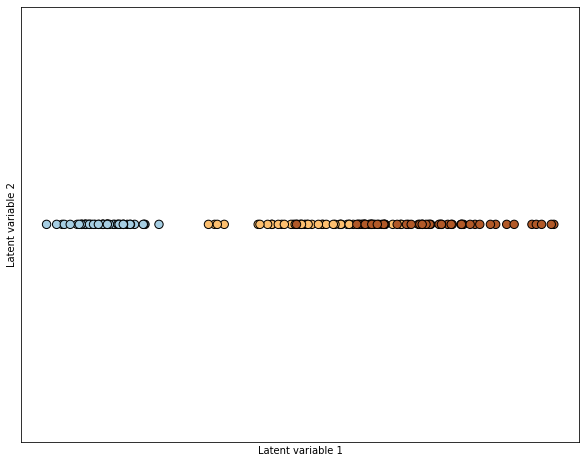

In [ ]:
model = AutoEncoder(4, 50, 2, 14)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0005)
train_model(model, optimizer, 12500, x, x, torch.nn.MSELoss(), verbose=True)

latent, x_recon = model(torch.Tensor(x).to(torch.float))
latent, x_recon = latent.detach(), x_recon.detach()

plt.figure(1, figsize=(10, 8))

plt.scatter(latent[:, 0], latent[:, 1], c=y, edgecolors="k", cmap=plt.cm.Paired, s=70)
plt.xlabel("Latent variable 1")
plt.ylabel("Latent variable 2")

plt.xticks(())
plt.yticks(())

plt.show()

Epoch 0: l: 16.2077579498291 t1l: -0.0 t2l: -0.0 t21l: -0.0
[[-0.1 -0.1  0.1 -0.1  4.8  3.1  1.6  0.2  0.   0. ]
 [-0.1 -0.1  0.1 -0.1  5.   2.   3.5  1.   0.   0. ]
 [-0.1 -0.1  0.1 -0.1  5.5  2.6  4.4  1.2  0.   0. ]
 [-0.1 -0.1  0.1 -0.1  6.9  3.2  5.7  2.3  0.   0. ]]
Epoch 500: l: 0.7100125551223755 t1l: -0.05281055346131325 t2l: -0.14411455392837524 t21l: -0.0370212085545063
[[5.1 2.6 3.4 1.1 4.8 3.1 1.6 0.2 0.7 0. ]
 [5.6 2.9 3.7 1.2 5.  2.  3.5 1.  0.9 0. ]
 [5.9 3.1 3.9 1.3 5.5 2.6 4.4 1.2 1.1 0. ]
 [6.7 3.4 4.4 1.4 6.9 3.2 5.7 2.3 1.3 0. ]]
Epoch 1000: l: 0.6135460734367371 t1l: -0.08916589617729187 t2l: -0.17028018832206726 t21l: -0.024812469258904457
[[4.8 2.4 3.2 1.  4.8 3.1 1.6 0.2 0.7 0. ]
 [5.5 2.8 3.7 1.2 5.  2.  3.5 1.  0.9 0. ]
 [6.  3.  4.  1.3 5.5 2.6 4.4 1.2 1.1 0. ]
 [7.  3.5 4.6 1.5 6.9 3.2 5.7 2.3 1.3 0. ]]
Epoch 1500: l: 0.5829187035560608 t1l: -0.0529545433819294 t2l: -0.1297207474708557 t21l: -0.028807884082198143
[[4.5 2.3 3.1 1.  4.8 3.1 1.6 0.2 0.6 0. ]
 

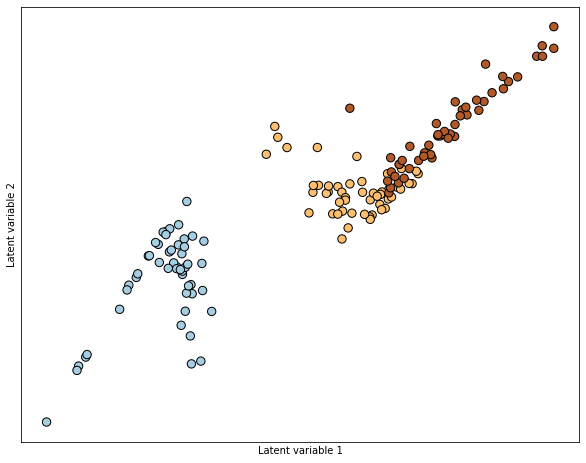

In [ ]:
model = AutoEncoder(4, 50, 2, 7)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001, weight_decay=0.01)
train_model_triplet(model, optimizer, 10000, x, x, torch.nn.MSELoss(), verbose=True)

latent, x_recon = model(torch.Tensor(x).to(torch.float))
latent, x_recon = latent.detach(), x_recon.detach()

plt.figure(1, figsize=(10, 8))

plt.scatter(latent[:, 0], latent[:, 1], c=y, edgecolors="k", cmap=plt.cm.Paired, s=70)
plt.xlabel("Latent variable 1")
plt.ylabel("Latent variable 2")

plt.xticks(())
plt.yticks(())

plt.show()